## Text from image

In [28]:
from PIL import Image, ImageFilter, ImageColor
import pytesseract

**You need to install Tesseract-OCR before https://github.com/UB-Mannheim/tesseract/wiki**

In [29]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

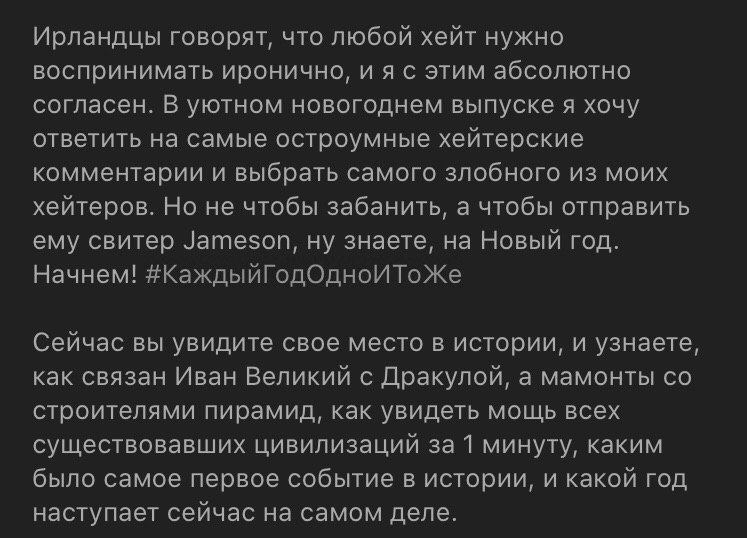

In [30]:
file = Image.open('file.jpg')
im = file.convert('L')
im

In [31]:
text = pytesseract.image_to_string(im, lang='rus+eng+math')
print(text)

Ирландцы говорят, что любой хейт нужно
воспринимать иронично, и я с этим абсолютно
согласен. В уютном новогоднем выпуске я хочу
ответить на самые остроумные хейтерские
комментарии и выбрать самого злобного из моих
хейтеров. Но не чтобы забанить, а чтобы отправить
ему свитер Jameson, ну знаете, на Новый год.
Начнем! #КаждыйГодОдноИТоЖе

Сейчас вы увидите свое место в истории, и узнаете,
как связан Иван Великий с Дракулой, а мамонты со
ео ИЕ ее
существовавших цивилизаций за 1 минуту, каким
Ее NepBoe cobbiTue B еее VU Kako roy,
наступает сейчас на самом деле.


## Text and Images from pdf

In [2]:
import fitz 

In [50]:
def images_from_pdf(path_to_pdf):
    with fitz.open(path_to_pdf) as doc:
        for current_page in range(len(doc)):  
            for image in doc.getPageImageList(current_page):
                xref = image[0]
                pix = fitz.Pixmap(doc, xref)
                if pix.n < 5:        # this is GRAY or RGB
                    pix.writePNG("OutputData/page%s-%s.png" % (current_page, xref))
                else:                # CMYK: convert to RGB first
                    pix1 = fitz.Pixmap(fitz.csRGB, pix)
                    pix1.writePNG("page%s-%s.png" % (current_page, xref))
                    pix1 = None
                pix = None

In [51]:
images_from_pdf('test.pdf')

In [47]:
def text_from_pdf(path_to_pdf):
    with fitz.open(path_to_pdf) as doc:  
        text = ""
        for i in range(doc.pageCount): 
            page = doc.loadPage(i)    
            text += page.getText("text")    
        return text     

In [48]:
print(text_from_pdf('test1.pdf'))

Список формулировок к зачёту по курсу  
«Методы вычислений и вычислительный практикум»,  
341-344 гр., 2018/2019 учебный год 
(лектор  Лебедева А. В.) 
 
1. Постановка задачи алгебраического интерполирования.  
2. Представление интерполяционного алгебраического многочлена в форме Лагранжа. 
3. Представление интерполяционного алгебраического многочлена в форме Ньютона. 
4. Интерполирование по равноотстоящим узлам. Интерполяционная формула Ньютона для начала 
таблицы. 
5. Интерполирование по равноотстоящим узлам. Интерполяционная формула Ньютона для конца 
таблицы. 
6. Теорема о представлении погрешности алгебраического интерполирования. 
7. Постановка задачи интерполирования Эрмита.  
8. Представление остаточного члена в эрмитовом интерполировании. 
9. Простейшие формулы численного дифференцирования для приближенного вычисления первой 
и второй производной таблично-заданной функции. Порядок погрешности формул. 
10. Теорема о погрешности формулы численного дифференцирования. 
11. Определ

## Text and Images from DOCX

In [27]:
import docx2txt

# extract text
text = docx2txt.process("Formulirovki_2019-2020.docx")

# extract text and write images
# text = docx2txt.process("test.docx", "C:\\Users\\Fedor\\Documents\\Edu\\ComputerNetworks\\ComputerNetworks") 

## DOC to DOCX

In [6]:
from glob import glob
import re
import os
import win32com.client as win32
from win32com.client import constants

# Create list of paths to .doc files
paths = glob('C:/Users/Fedor/Documents/Edu/ComputerNetworks/ComputerNetworks/Formulirovki_2019-2020.doc', recursive=True)

def save_as_docx(path):
    # Opening MS Word
    word = win32.gencache.EnsureDispatch('Word.Application')
    doc = word.Documents.Open(path)
    doc.Activate ()

    # Rename path with .docx
    new_file_abs = os.path.abspath(path)
    new_file_abs = re.sub(r'\.\w+$', '.docx', new_file_abs)

    # Save and Close
    word.ActiveDocument.SaveAs(
        new_file_abs, FileFormat=constants.wdFormatXMLDocument
    )
    doc.Close(False)

for path in paths:
    save_as_docx(path)

## DOC/DOCX to PDF

In [13]:
import sys
import os
import comtypes.client

wdFormatPDF = 17

in_file = os.path.abspath('C:/Users/Fedor/Documents/Edu/ComputerNetworks/ComputerNetworks/test.docx')
out_file = os.path.abspath('C:/Users/Fedor/Documents/Edu/ComputerNetworks/ComputerNetworks/test1.pdf')

word = comtypes.client.CreateObject('Word.Application')
doc = word.Documents.Open(in_file)
doc.SaveAs(out_file, FileFormat=wdFormatPDF)
doc.Close()
word.Quit()

0

## HTML/LaTex/ePub/etc to PDF

In [5]:
import pypandoc

In [6]:
pypandoc.convert_file("Formulirovki_2019-2020.docx",
                      'tex',
                      encoding='utf-8',
                      outputfile="testtex.tex",
                      extra_args=[
                          '-V', 'geometry:margin=1.5cm', '--pdf-engine',
                          'C:\\texlive\\2019\\bin\\win32\\xelatex.exe'
                      ])

''